# Museum Data Analysis Project: Untangling The Mess
## Searching for derogatory terms

### Disclaimer: This work includes derogatory language that some people may find profane, vulgar, or offensive. The derogatory terms are used only for the purpose of finding them within museum collections. The inclusion of the offensive language is not meant to promote or condone any discriminatory or harmful beliefs. Reader discretion is advised.



In [143]:
# import libraries

import pandas as pd
import numpy as np
import requests
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display, Image, IFrame

# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)
import warnings 
  

warnings.filterwarnings('ignore') 

In [129]:
#load to dataframe
df = pd.read_csv('objects.csv')

dropped_cols = ['contextualtextcount', 'accesslevel', 'dateoflastpageview', 'totaluniquepageviews', 'markscount',
                'publicationcount', 'totaluniquepageviews', 'contact', 'colorcount', 'rank', 'id', 'state', 
                'verificationleveldescription', 'images','imagecount', 'worktypes', 'imagecount', 'classificationid',
                'standardreferencenumber', 'signed', 'relatedcount', 'verificationlevel', 'titlescount',
                'peoplecount', 'lastupdate', 'periodid', 'edition', 'lendingpermissionlevel', 'colors', 'groupcount',
                'dateoffirstpageview', 'datebegin', 'exhibitioncount', 'imagepermissionlevel', 'mediacount', 'techniqueid', 
                'seeAlso', 'details', 'videos', 'audio']

df.drop(dropped_cols, axis = 1, inplace = True)

## Pulling records with offensive keywords.
Here we can do an inital scan for some offensive keywords. Examples are as follows:
* squaw
* negro
* nigger
* savage
* eskimo
* indian
* redneck (red neck)
* jap
* oriental

In [5]:
def search_string_in_dataframe(df, search_string, case_sensitive=False):
    """
    Searches for a string in any field of a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to search within.
        search_string (str): The string to search for.
        case_sensitive (bool, optional): Whether the search is case-sensitive. Defaults to False.

    Returns:
         pd.DataFrame: A DataFrame containing rows where the string was found, or an empty DataFrame if not found.
    """
    mask = np.column_stack([df[col].astype(str).str.contains(search_string, case=case_sensitive, na=False).values for col in df])
    return df[mask.any(axis=1)]

## Looking for "squaw" in records

In [684]:
squaw_df = search_string_in_dataframe(df, 'squaw')

In [685]:
print(squaw_df.shape)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 50)
display(squaw_df)
print(squaw_df.title)

(3, 27)


Unnamed: 0 copyright                                       creditline  \
67679          79       NaN  Harvard Art Museums/Fogg Museum, Anonymous Gift   
68164          64       NaN  Harvard Art Museums/Fogg Museum, Anonymous Gift   
68734          34       NaN  Harvard Art Museums/Fogg Museum, Anonymous Gift   

                      createdate                   division period  \
67679  2002-02-16T00:00:00-05:00  European and American Art    NaN   
68164  2002-02-16T00:00:00-05:00  European and American Art    NaN   
68734  2002-02-06T00:00:00-05:00  European and American Art    NaN   

       totalpageviews  accessionyear classification style commentary  \
67679              31         1953.0       Drawings   NaN        NaN   
68164              17         1953.0       Drawings   NaN        NaN   
68734              20         1953.0       Drawings   NaN        NaN   

      technique description  \
67679       NaN         NaN   
68164       NaN         NaN   
68734       NaN         NaN   

                                                  medium  \
67679  Watercolor and black ink over traces of graphi...   
68164  Watercolor and black ink over traces of graphi...   
68734  Watercolor and black ink over traces of graphi...   

                                                   title accessionmethod  \
67679  Squawking Bird with Talons Extended to the Rig...            Gift   
68164  Two Perched and Squawking Pheasants; verso: blank            Gift   
68734     Two Squawking Ducks in the Water; verso: blank            Gift   

      provenance         dated              department  dateend  \
67679        NaN  18th century  Department of Drawings        0   
68164        NaN  18th century  Department of Drawings        0   
68734        NaN  18th century  Department of Drawings        0   

                                                  people       century  \
67679  [{'role': 'Artist', 'birthplace': 'Paris', 'ge...  18th century   
68164  [{'role': 'Artist', 'birthplace': 'Paris', 'ge...  18th century   
68734  [{'role': 'Artist', 'birthplace': 'Paris', 'ge...  18th century   

      objectnumber labeltext culture  objectid  \
67679   1953.75.38       NaN  French    147157   
68164   1953.75.23       NaN  French    147706   
68734   1953.75.52       NaN  French    148457   

                                             dimensions  
67679                                               NaN  
68164  irregular: 33.2 x 30 cm (13 1/16 x 11 13/16 in.)  
68734                                               NaN

67679    Squawking Bird with Talons Extended to the Rig...
68164    Two Perched and Squawking Pheasants; verso: blank
68734       Two Squawking Ducks in the Water; verso: blank
Name: title, dtype: object


## Squaw returned three records with 'squaw'king birds in tile field

## Now searching for 'negro' in records

In [41]:
ne_df = search_string_in_dataframe(df, 'negro')
ne_df.to_csv('ne.csv')

In [43]:
print(f"There are {ne_df.shape[0]} entries with negro in a field.")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 50)
display(ne_df[:5])


There are 306 entries with negro in a field.


Unnamed: 0 copyright                                         creditline  \
415          15       NaN  Harvard Art Museums/Fogg Museum, Transfer from...   
416          16       NaN  Harvard Art Museums/Fogg Museum, Transfer from...   
417          17       NaN  Harvard Art Museums/Fogg Museum, Transfer from...   
674          74       NaN  Harvard Art Museums/Fogg Museum, Transfer from...   
675          75       NaN  Harvard Art Museums/Fogg Museum, Transfer from...   

                    createdate                     division period  \
415  2004-03-11T00:00:00-05:00  Modern and Contemporary Art    NaN   
416  2004-06-02T00:00:00-04:00  Modern and Contemporary Art    NaN   
417  2004-03-11T00:00:00-05:00  Modern and Contemporary Art    NaN   
674  2004-07-14T00:00:00-04:00  Modern and Contemporary Art    NaN   
675  2004-07-14T00:00:00-04:00  Modern and Contemporary Art    NaN   

     totalpageviews  accessionyear classification style commentary  \
415              58         2011.0    Photographs   NaN        NaN   
416              91         2011.0    Photographs   NaN        NaN   
417              37         2011.0    Photographs   NaN        NaN   
674              18         2011.0    Photographs   NaN        NaN   
675              24         2011.0    Photographs   NaN        NaN   

          technique description                                       medium  \
415  Platinum print         NaN                                          NaN   
416  Platinum print         NaN                                          NaN   
417  Platinum print         NaN  Platinum prints mounted to board, black ink   
674  Platinum print         NaN                                          NaN   
675  Platinum print         NaN                                          NaN   

                                                 title accessionmethod  \
415  Races, Negroes: United States. Virginia. Hampt...        Transfer   
416  Races, Negroes: United States. Virginia. Hampt...        Transfer   
417  Races, Negroes: United States. Virginia. Hampt...        Transfer   
674  Races, Negroes: United States. Virginia. Hampt...        Transfer   
675  Races, Negroes: United States. Virginia. Hampt...        Transfer   

    provenance      dated                 department  dateend  \
415        NaN  1899-1900  Department of Photographs     1900   
416        NaN  1899-1900  Department of Photographs     1900   
417        NaN  1899-1900  Department of Photographs     1900   
674        NaN  1899-1900  Department of Photographs     1900   
675        NaN  1899-1900  Department of Photographs     1900   

                                                people            century  \
415  [{'role': 'Artist', 'birthplace': 'Grafton, WV...  19th-20th century   
416  [{'role': 'Artist', 'birthplace': 'Grafton, WV...  19th-20th century   
417  [{'role': 'Artist', 'birthplace': 'Grafton, WV...  19th-20th century   
674  [{'role': 'Artist', 'birthplace': 'Grafton, WV...  19th-20th century   
675  [{'role': 'Artist', 'birthplace': 'Grafton, WV...  19th-20th century   

     objectnumber labeltext   culture  objectid  \
415    3.2002.116       NaN  American      5182   
416    3.2002.357       NaN  American      5183   
417    3.2002.117       NaN  American      5184   
674  3.2002.483.1       NaN  American      5469   
675    3.2002.483       NaN  American      5470   

                                     dimensions  
415      mount: 35.5 x 56 cm (14 x 22 1/16 in.)  
416      mount: 35.5 x 56 cm (14 x 22 1/16 in.)  
417      mount: 35.5 x 56 cm (14 x 22 1/16 in.)  
674  image: 17.5 x 23.4 cm (6 7/8 x 9 3/16 in.)  
675      mount: 35.5 x 56 cm (14 x 22 1/16 in.)

## Negro was found in 306 entries, in 297 the word was in the title.

In [45]:
title_ne_df = search_string_in_dataframe(pd.DataFrame(ne_df['title']), 'negro')
print(f"There are {len(title_ne_df)} records with the word negro in the title.")

There are 297 records with the word negro in the title.


In [47]:
display(title_ne_df.title.unique()[:3])

array(['Races, Negroes: United States. Virginia. Hampton. Hampton Normal and Industrial School: Agencies Promoting Assimilation of the Negro: Hampton Normal and Agricultural Institute, Hampton, Va.',
       'Races, Negroes: United States. Virginia. Hampton. Hampton Normal and Industrial School: Agencies Promoting Assimilation of the Negro. Training for Commercial and Industrial Employment. Hampton Normal and Agricultural Institute, Hampton, Va.',
       'Races, Negroes: United States. Virginia. Hampton. Hampton Normal and Industrial School: Agencies Promoting Assimilation of the Negro. Hampton Normal and Agricultural Institute, Hampton, Va.'],
      dtype=object)

## Many titles are of form similar to: 
Races, Negroes: United States. Virginia. Hampton. Hampton Normal and Industrial School: Agencies Promoting Assimilation of the Negro: Hampton Normal and Agricultural Institute, Hampton, Va.
## Lets try removing those
What is left is written to csv, ne.csv

In [49]:
other_ne_df = ne_df[~ne_df.title.str.contains('Races, Negroes')]
other_ne_df = other_ne_df [~other_ne_df .title.str.contains('Social Settlements')]
other_ne_df = other_ne_df [~other_ne_df.title.str.contains('Montenegro')]
example_df = other_ne_df
example_df.reset_index(inplace = True)
exclude_list = [0,5,6, 15, 16, 20, 23, 24, 25, 26, 27, 31]
example_df = example_df.drop(exclude_list)
display(example_df)

index  Unnamed: 0                                          copyright  \
1    25219          19                            © Robert Smullyan Sloan   
2    29486          86  © Estate of Ben Shahn / Artists Rights Society...   
3    33766          66  © Walker Evans Archive, The Metropolitan Museu...   
4    37100           0                                                NaN   
7    73681          81                                                NaN   
8    73682          82                                                NaN   
9    74002           2                                                NaN   
10   74013          13                                                NaN   
11   74944          44                                                NaN   
12   75339          39                                                NaN   
13   75346          46                                                NaN   
14   75637          37                                                NaN   
17  103021          21                                                NaN   
18  115616          16                                                NaN   
19  136446          46                                                NaN   
21  140560          60                                                NaN   
22  142535          35  © John T. Biggers Estate / Artists Rights Soci...   
28  154408           8                                                NaN   
29  154536          36                                                NaN   
30  158351          51                                                NaN   
32  178447          47                                                NaN   
33  182154          54                                                NaN   
34  182475          75                                                NaN   
35  182476          76                                                NaN   
36  185872          72                                                NaN   
37  188687          87                                                NaN   
38  197016          16                                                NaN   
39  203810          10                                                NaN   
40  207368          68                                                NaN   
41  211999          99                                                NaN   
42  235802           2  © Walker Evans Archive, The Metropolitan Museu...   

                                           creditline  \
1   Harvard Art Museums/Fogg Museum, Purchase thro...   
2   Harvard Art Museums/Fogg Museum, Stephen Lee T...   
3   Harvard Art Museums/Fogg Museum, Gift of Sam P...   
4   Harvard Art Museums/Arthur M. Sackler Museum, ...   
7   Harvard Art Museums/Fogg Museum, Transfer from...   
8   Harvard Art Museums/Fogg Museum, Transfer from...   
9   Harvard Art Museums/Fogg Museum, Transfer from...   
10  Harvard Art Museums/Fogg Museum, Transfer from...   
11  Harvard Art Museums/Fogg Museum, Transfer from...   
12  Harvard Art Museums/Fogg Museum, Transfer from...   
13  Harvard Art Museums/Fogg Museum, Transfer from...   
14  Harvard Art Museums/Fogg Museum, Transfer from...   
17  Harvard Art Museums/Arthur M. Sackler Museum, ...   
18  Harvard Art Museums/Arthur M. Sackler Museum, ...   
19  Harvard Art Museums/Fogg Museum, Transfer from...   
21  Harvard Art Museums/Fogg Museum, Gift of Barba...   
22  Harvard Art Museums/Fogg Museum, Bequest of Wi...   
28  Harvard Art Museums/Straus Center for Conserva...   
29  Harvard Art Museums/Straus Center for Conserva...   
30  Harvard Art Museums/Fogg Museum, Purchase thro...   
32  Harvard Art Museums/Fogg Museum, Transfer from...   
33    Harvard Art Museums/Fogg Museum, Anonymous Gift   
34  Harvard Art Museums/Fogg Museum, Transfer from...   
35  Harvard Art Museums/Fogg Museum, Transfer from...   
36  Harvard Art Museums/Fogg Museum, Transfer from...   
37  Harvard Art Museums/Fogg Museum, Anonymous Loa...   
3

In [843]:
example_df.to_csv('ne.csv')

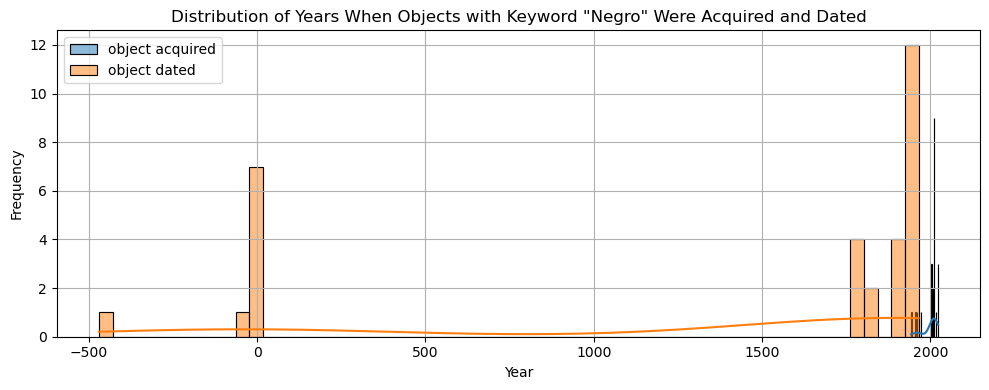

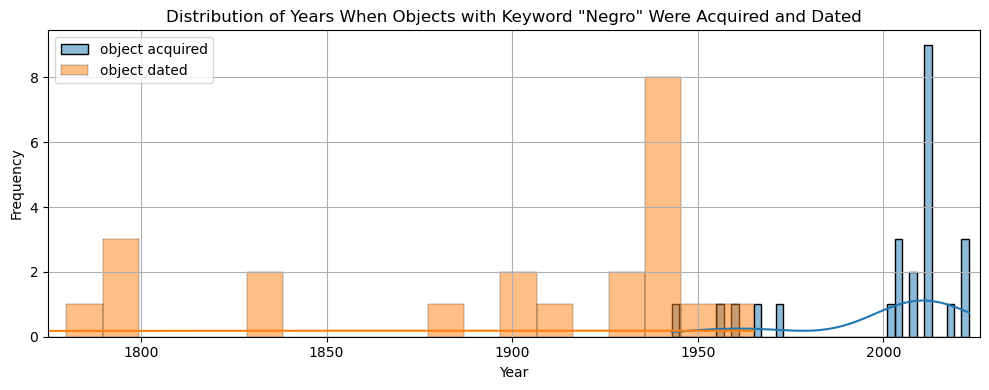

In [217]:
plt.figure(figsize=(10, 4))
sns.histplot(data=example_df, x='accessionyear', kde=True, label="object acquired", bins = 60)
sns.histplot(data=example_df, x='dateend', kde=True, label="object dated", bins = 60)
plt.title('Distribution of Years When Objects with Keyword "Negro" Were Acquired and Dated')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(data=example_df, x='accessionyear', kde=True, label="object acquired", bins = 40)
sns.histplot(data=example_df, x='dateend', kde=True, label="object dated", bins = 250)
plt.title('Distribution of Years When Objects with Keyword "Negro" Were Acquired and Dated')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xlim(1775,2026)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Searching for word n****r

In [845]:
ni_df = search_string_in_dataframe(df, 'nigger')
ni_df.to_csv('ni.csv')

In [846]:
print(f"There are {ni_df.shape[0]} entries with n****r in a field.")
display(ni_df)
ni_df.reset_index(inplace = True)

There are 3 entries with n****r in a field.


Unnamed: 0                                          copyright  \
8838            38                                                NaN   
155412          12  © Faith Ringgold / Artists Rights Society (ARS...   
211961          61                                                NaN   

                                               creditline  \
8838    Harvard Art Museums/Fogg Museum, On loan from ...   
155412  Harvard Art Museums/Fogg Museum, Richard Norto...   
211961  Harvard Art Museums/Fogg Museum, Francis H. Bu...   

                       createdate                     division period  \
8838    2005-08-31T00:00:00-04:00    European and American Art    NaN   
155412  2013-10-30T12:15:35-04:00  Modern and Contemporary Art    NaN   
211961  1997-10-21T00:00:00-04:00  Modern and Contemporary Art    NaN   

        totalpageviews  accessionyear classification style commentary  \
8838               567            NaN         Prints   NaN        NaN   
155412            3665         2014.0      Paintings   NaN        NaN   
211961              28         1955.0         Prints   NaN        NaN   

               technique description         medium  \
8838    Chromolithograph         NaN            NaN   
155412               NaN         NaN  Oil on canvas   
211961          Drypoint         NaN            NaN   

                                                title accessionmethod  \
8838                                      Free Nigger    Not Recorded   
155412  Black Light Series #8: Red White Black Nigger        Purchase   
211961                                     Niggertanz        Purchase   

                                               provenance         dated  \
8838                                                  NaN  19th century   
155412  Faith Ringgold, created 1969, sold [through AC...          1969   
211961  Paul A. Struck, sold; to Fogg Art Museum, Dece...  20th century   

                                     department  dateend  \
8838                       Department of Prints        0   
155412  Department of Modern & Contemporary Art     1969   
211961                     Department of Prints        0   

                                                   people       century  \
8838    [{'role': 'Artist', 'birthplace': None, 'gende...  19th century   
155412  [{'role': 'Artist', 'birthplace': 'New York, N...  20th century   
211961  [{'role': 'Artist', 'birthplace': 'Leipzig, Ge...  20th century   

       objectnumber                                          labeltext  \
8838    120.1976.66                                                NaN   
155412      2014.18  Best known today for her story quilts addressi...   
211961       M13126                                                NaN   

         culture  objectid                                         dimensions  
8838    American     20187                                                NaN  
155412  American    349671  61 × 61 cm (24 × 24 in.)\r\nframed: 63.8 × 63....  
211961    German    259345                                                NaN

In [849]:
ni_df.drop([1,2], inplace = True)
example_df = pd.concat([example_df, ni_df], ignore_index=True)

### Of three results, all have the keyword in the title, one is a contemporary work by black woman, one is in German and one is a 19th century print

## Searching for word savage

In [853]:
sa_df = search_string_in_dataframe(df, 'savage')

In [854]:
print(f"There are {sa_df.shape[0]} entries with savage in a field.")
display(sa_df)

There are 35 entries with savage in a field.


Unnamed: 0                                          copyright  \
73014           14                                                NaN   
75379           79                                                NaN   
75797           97                                                NaN   
75809            9                                                NaN   
113562          62                                                NaN   
121101           1                                                NaN   
123172          72                                                NaN   
123404           4                                                NaN   
128349          49                                                NaN   
131964          64                                                NaN   
132051          51                                                NaN   
132060          60                                                NaN   
132076          76                                                NaN   
134005           5                                                NaN   
147722          22                                                NaN   
148452          52  © Kara Walker, Courtesy of Sikkema Jenkins & C...   
149678          78                      © Gilles Peress/Magnum Photos   
153500           0                                                NaN   
153755          55                                                NaN   
153918          18                                                NaN   
156518          18                                                NaN   
157016          16                                                NaN   
183885          85                                                NaN   
202317          17                                                NaN   
214926          26                                                NaN   
216286          86                                                NaN   
216520          20                                                NaN   
216850          50                                                NaN   
220484          84                                                NaN   
220691          91                                                NaN   
220692          92                                                NaN   
220900           0                                                NaN   
222663          63                                                NaN   
232186          86                                                NaN   
235178          78                                                NaN   

                                               creditline  \
73014   Harvard Art Museums/Fogg Museum, Transfer from...   
75379   Harvard Art Museums/Fogg Museum, Transfer from...   
75797   Harvard Art Museums/Fogg Museum, Transfer from...   
75809   Harvard Art Museums/Fogg Museum, Transfer from...   
113562  Harvard Art Museums/Arthur M. Sackler Museum, ...   
121101  Harvard Art Museums/Fogg Museum, Gift of Rober...   
123172  Harvard University Portrait Collection, Gift o...   
123404  Harvard University Portrait Collection, Painte...   
128349  Harvard University Portrait Collection, Beques...   
131964  Harvard Art Museums/Fogg Museum, Margaret Fish...   
132051  Harvard Art Museums/Fogg Museum, Gift of Aliso...   
132060  Harvard Art Museums/Fogg Museum, Purchase with...   
132076  Harvard Art Museums/Fogg Museum, Gift of Aliso...   
134005  Harvard University Portrait Collection, Beques...   
147722  Harvard Art Museums/Fogg Museum, Gift of Peter...   
148452  Harvard Art Museums/Fogg Museum, Margaret Fish...   
149678  Harvard Art Museums/Fogg Museum, Gift of Eelco...   
153500  Harvard Art Museums/Straus Center for Conserva...   
153755  Harvard Art Museums/Straus Center for Conserva...   
153918  Harvard Art Museums/Straus Center for Conserva...   
156518  Harvard Art Museums/Fogg Museum, Acquisition F...   
157016  Harvard Art Museums/Straus Ce

## There are 35 records with word savage

## Many of the records have savage as a last name. So I will exclude those from search

In [859]:
sa_df.drop(['provenance', 'people', 'creditline'], axis = 1, inplace = True)

In [861]:
sa_df = search_string_in_dataframe(sa_df, 'savage')
sa_df = sa_df[~sa_df.title.str.contains('James Savage')]
sa_df.reset_index(inplace = True)

In [863]:
sa_df.shape

(16, 25)

## Now there are just 16 records with the word savage. 
We can also exclude areas where savage is not used to describe people

In [866]:
pd.set_option('display.max_colwidth', 50)
exclude_list = [0,2,3,4,5,6,7]
sa_df= sa_df.drop(exclude_list)
display(sa_df)

index  Unnamed: 0 copyright                 createdate  \
1   147722          22       NaN  2009-10-26T11:51:19-04:00   
8   216286          86       NaN  1997-10-19T00:00:00-04:00   
9   216520          20       NaN  1997-10-19T00:00:00-04:00   
10  216850          50       NaN  1997-10-19T00:00:00-04:00   
11  220484          84       NaN  1997-10-18T00:00:00-04:00   
12  220691          91       NaN  1997-10-18T00:00:00-04:00   
13  220692          92       NaN  1997-10-18T00:00:00-04:00   
14  220900           0       NaN  1997-10-18T00:00:00-04:00   
15  222663          63       NaN  1997-10-18T00:00:00-04:00   

                     division period  totalpageviews  accessionyear  \
1   European and American Art    NaN             167         2009.0   
8   European and American Art    NaN               5         1992.0   
9   European and American Art    NaN               3         1992.0   
10  European and American Art    NaN               0         1992.0   
11  European and American Art    NaN               4            NaN   
12  European and American Art    NaN               0            NaN   
13  European and American Art    NaN               0            NaN   
14  European and American Art    NaN               2            NaN   
15  European and American Art    NaN               2            NaN   

   classification style commentary       technique  \
1          Prints   NaN        NaN         Etching   
8          Prints   NaN        NaN      Lithograph   
9          Prints   NaN        NaN      Lithograph   
10         Prints   NaN        NaN  Wood engraving   
11         Prints   NaN        NaN      Lithograph   
12         Prints   NaN        NaN      Lithograph   
13         Prints   NaN        NaN      Lithograph   
14         Prints   NaN        NaN      Lithograph   
15         Prints   NaN        NaN      Lithograph   

                                          description medium  \
1   Frontispiece for 1851 printing of the Comic Al...    NaN   
8                                                 NaN    NaN   
9                                                 NaN    NaN   
10                                                NaN    NaN   
11                                                NaN    NaN   
12                                                NaN    NaN   
13                                                NaN    NaN   
14                                                NaN    NaN   
15                                                NaN    NaN   

                                                title accessionmethod dated  \
1   Probable Effects of Over Female Emigration, or...            Gift  1851   
8                             Isn't that savage ugly!            Gift  1850   
9                                   Bineau the Savage            Gift  1850   
10                                  Bineau the savage            Gift  1850   
11  The Savage Bineau Having... Finally Discovered...            Gift  1850   
12           The Savage Bineau Making His Entrance...            Gift  1849   
13           The Savage Bineau Making His Entrance...            Gift  1849   
14   The Danger of... Visiting a Far Too Savage Place            Gift  1845   
15  The Savage Binau Having...Finally Found a Use ...         Bequest  1850   

              department  dateend       century objectnumber labeltext  \
1   Department of Prints     1851  19th century     2009.135       NaN   
8   Department of Prints     1850  19th century    M21988.16       NaN   
9   Department of Prints     1850  19th century   M21988.175       NaN   
10  Department of Prints     1850  19th century    M21988.19       NaN   
11  Department of Prints     1850  19th century       M18563       NaN   
12  Department of Prints     1849  19th century       M16861       NaN   
13  Department of Prints     1849  19th century       M17562       NaN   
14  Department of Prints     1845  19th century       M16773       NaN   
15  Department of Prints

In [868]:
sa_df.to_csv('savage.csv')
example_df = pd.concat([example_df, sa_df], ignore_index=True)

## There are a total of 18 records with the keyword 'savage'. A few are using the term savage as a description for a person or peoples.

## Searching for keyword 'eskimo'

In [734]:
esk_df = search_string_in_dataframe(df, 'eskimo')

In [735]:
esk_df.shape

(0, 27)

## There are no records containing keyword 'eskimo'

## Searching for keyword 'indian'

In [888]:
ind_df = search_string_in_dataframe(df, 'indian')

In [889]:
ind_df.shape

(4865, 27)

In [892]:
display(ind_df[:5])

Unnamed: 0 copyright                                         creditline  \
13           13       NaN  Harvard Art Museums/Arthur M. Sackler Museum, ...   
92           92       NaN  Harvard Art Museums/Arthur M. Sackler Museum, ...   
148          48       NaN  Harvard Art Museums/Arthur M. Sackler Museum, ...   
151          51       NaN  Harvard Art Museums/Arthur M. Sackler Museum, ...   
152          52       NaN  Harvard Art Museums/Arthur M. Sackler Museum, ...   

                    createdate                     division          period  \
13   2006-03-24T00:00:00-05:00  Asian and Mediterranean Art             NaN   
92   2006-01-17T00:00:00-05:00  Asian and Mediterranean Art  Safavid period   
148  2006-01-24T00:00:00-05:00  Asian and Mediterranean Art             NaN   
151  2006-03-08T00:00:00-05:00  Asian and Mediterranean Art             NaN   
152  2006-03-08T00:00:00-05:00  Asian and Mediterranean Art             NaN   

     totalpageviews  accessionyear classification style  \
13             1237         1995.0    Manuscripts   NaN   
92              592         1950.0         Albums   NaN   
148              60         2006.0   Textile Arts   NaN   
151             219         2006.0       Drawings   NaN   
152              43         2006.0       Drawings   NaN   

                                            commentary technique  \
13                                                 NaN       NaN   
92                                                 NaN       NaN   
148  The patka as an item of clothing has a long hi...       NaN   
151                                                NaN       NaN   
152                                                NaN       NaN   

                                           description  \
13   This painting depicts figures marching into ba...   
92                                                 NaN   
148  The dimensions of the patka (247.3 cm long wit...   
151  Two small puffer fish are facing each other ha...   
152  The fish is painted in the center of the page,...   

                                                medium  \
13                          Opaque watercolor on paper   
92   Black ink and opaque watercolor, bordered with...   
148                          Cotton with silk and gold   
151  Watercolor and gouache on Whatman paper; Compa...   
152  Watercolor and gouache on Whatman paper; Compa...   

                                                 title accessionmethod  \
13   Battle Scene (painting, recto), folio fragment...        Purchase   
92                                    Mystical Journey        Purchase   
148                                       Patka (sash)            Gift   
151      “Putka”, folio from the album Fishes of India        Purchase   
152        “Pan”, folio from the album Fishes of India            Gift   

    provenance         dated                                department  \
13         NaN        c.1540  Department of Islamic & Later Indian Art   
92         NaN       c. 1650  Department of Islamic & Later Indian Art   
148        NaN  18th century  Department of Islamic & Later Indian Art   
151        NaN       c. 1810  Department of Islamic & Later Indian Art   
152        NaN       c. 1810  Department of Islamic & Later Indian Art   

     dateend people       century objectnumber labeltext  culture  objectid  \
13      1545    NaN  16th century      1995.66       NaN   Indian      1428   
92      1655    NaN  17th century     1950.135       NaN  Persian      4648   
148        0    NaN  18th century      2006.15       NaN   Indian      4848   
151     1815    NaN  19th century    2006.16.3       NaN   Indian      4852   
152     1815    NaN  19th century    2006.16.5       NaN      NaN      4855   

                                 dimensions  
13       17.9 x 24 cm (7 1/16 x 9 7/16 in.)  
92   12.5 x 25.2 cm (4 15/16 x 9 15/16 in.)  
148  46.5 x 247.3 cm (18 5/16 x 97 3/8 in.)  
151      28.58 x 48.26 cm (11 1/4 x 19

## This search returned 4865 records. We want to look at uses of the word 'indian' not realated to India, so to start we will eliminate the records within the division of 'Asian and Mediterranean Art', records that have 'Indian' for culture and records with the word 'Indiana'

In [895]:
ind_df = ind_df[ind_df['division'] !='Asian and Mediterranean Art']
ind_df = ind_df[ind_df['culture'] !='Indian']
indiana_ind_df = search_string_in_dataframe(ind_df, 'Indiana')
ind_df = ind_df.merge(indiana_ind_df, how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
ind_df.shape

(271, 27)

In [897]:
display(ind_df[:10])


Unnamed: 0 copyright                                         creditline  \
0          43       NaN  Harvard Art Museums/Fogg Museum, Transfer from...   
1          44       NaN  Harvard Art Museums/Fogg Museum, Transfer from...   
2          32       NaN  Harvard Art Museums/Fogg Museum, Transfer from...   
3           6       NaN  Harvard Art Museums/Fogg Museum, Transfer from...   
4           7       NaN  Harvard Art Museums/Fogg Museum, Transfer from...   
5           8       NaN  Harvard Art Museums/Fogg Museum, Transfer from...   
6          34       NaN  Harvard Art Museums/Fogg Museum, Transfer from...   
7          35       NaN  Harvard Art Museums/Fogg Museum, Transfer from...   
8          70       NaN  Harvard Art Museums/Fogg Museum, Transfer from...   
9          71       NaN  Harvard Art Museums/Fogg Museum, Transfer from...   

                  createdate                     division period  \
0  2006-02-10T00:00:00-05:00  Modern and Contemporary Art    NaN   
1  2006-02-10T00:00:00-05:00  Modern and Contemporary Art    NaN   
2  2006-02-10T00:00:00-05:00  Modern and Contemporary Art    NaN   
3  2006-02-10T00:00:00-05:00  Modern and Contemporary Art    NaN   
4  2006-02-10T00:00:00-05:00  Modern and Contemporary Art    NaN   
5  2006-02-10T00:00:00-05:00  Modern and Contemporary Art    NaN   
6  2006-02-17T00:00:00-05:00  Modern and Contemporary Art    NaN   
7  2006-02-17T00:00:00-05:00  Modern and Contemporary Art    NaN   
8  2006-02-10T00:00:00-05:00  Modern and Contemporary Art    NaN   
9  2006-02-10T00:00:00-05:00  Modern and Contemporary Art    NaN   

   totalpageviews  accessionyear classification style commentary  \
0              13         2011.0    Photographs   NaN        NaN   
1               9         2011.0    Photographs   NaN        NaN   
2               5         2011.0    Photographs   NaN        NaN   
3               9         2011.0    Photographs   NaN        NaN   
4              16         2011.0    Photographs   NaN        NaN   
5               4         2011.0    Photographs   NaN        NaN   
6               5         2011.0    Photographs   NaN        NaN   
7               2         2011.0    Photographs   NaN        NaN   
8               3         2011.0    Photographs   NaN        NaN   
9               5         2011.0    Photographs   NaN        NaN   

              technique description medium  \
0  Gelatin silver print         NaN    NaN   
1  Gelatin silver print         NaN    NaN   
2  Gelatin silver print         NaN    NaN   
3  Gelatin silver print         NaN    NaN   
4  Gelatin silver print         NaN    NaN   
5  Gelatin silver print         NaN    NaN   
6        Platinum print         NaN    NaN   
7        Platinum print         NaN    NaN   
8  Gelatin silver print         NaN    NaN   
9  Gelatin silver print         NaN    NaN   

                                               title accessionmethod  \
0  Races, Indians: United States. New York. Iroqu...        Transfer   
1  Races, Indians: United States. New York. Iroqu...        Transfer   
2  Races, Indians: United States. New York. Iroqu...        Transfer   
3  Races, Indians: United States. New York. Iroqu...        Transfer   
4  Races, Indians: United States. New York. Iroqu...        Transfer   
5  Races, Indians: United States. New York. Iroqu...        Transfer   
6  Races, Negroes: United States. Virginia. Hampt...        Transfer   
7  Races, Negroes: United States. Virginia. Hampt...        Transfer   
8  Races, Indians: United States. New York. Iroqu...        Transfer   
9  Races, Indians: United States. New York. Iroqu...        Transfer   

  provenance      dated                 department  dateend  \
0        NaN    c. 1903  Department of Photographs     1908   
1        NaN    c. 1903  Department of Photographs     1908   
2        NaN    c. 1903  Department of Photographs     1908   
3        NaN    c. 1903  Department of Photographs     1908   
4        NaN    c. 1903  Depart

## We were able to get the count of records down to 271. The 52 are photographs with titles in the style of:
"Races, Indians: United States. New York. Iroquois. Thomas Asylum for Orphan and Destitute Indian Children: State Thomas Asylum for Orphan and Destitute Indian Children, Iroquois, N.Y.: Laundry"

In [899]:
races_ind_df= search_string_in_dataframe(ind_df, 'Races')
races_ind_df.shape

(52, 27)

## Also removing records with:
* Indian temple
* colors: Indian red, yellow, lake

In [901]:
ind_df =ind_df[~ind_df.title.str.contains('|'.join(['Indian temple', 'Indian Red', "Indian red", 
                                                    'Indian Yellow','Indian lake', 'Indian Lake','Amerindians', 'Indian Summer']),case=False )]

In [903]:
not_races_ind_df = ind_df.merge(races_ind_df, how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
not_races_ind_df.reset_index(inplace = True)
print(not_races_ind_df.shape)
display(not_races_ind_df)

(107, 28)


index  Unnamed: 0                                copyright  \
0       26          15                                      NaN   
1       31          68                                      NaN   
2       32          27                                      NaN   
3       33          34  © 1991 Harry Sternberg / Brighton Press   
4       34          12      © Estate of Joseph Janney Steinmetz   
..     ...         ...                                      ...   
102    154          37                                      NaN   
103    155          37                                      NaN   
104    156          94                                      NaN   
105    157           7                                      NaN   
106    158           8                                      NaN   

                                            creditline  \
0    Harvard Art Museums/Fogg Museum, Gift of Jose ...   
1    Harvard Art Museums/Fogg Museum, Acquisition F...   
2    Harvard Art Museums/Fogg Museum, Acquisition F...   
3    Harvard Art Museums/Fogg Museum, Margaret Fish...   
4    Harvard Art Museums/Fogg Museum, Transfer from...   
..                                                 ...   
102  Harvard Art Museums/Fogg Museum, Gift of The H...   
103  Harvard Art Museums/Fogg Museum, Purchase thro...   
104  Harvard Art Museums/Fogg Museum, Gift of Profe...   
105  Harvard Art Museums/Fogg Museum, Gift of Profe...   
106  Harvard Art Museums/Fogg Museum, Gift of Profe...   

                    createdate                     division period  \
0    2005-01-28T00:00:00-05:00  Modern and Contemporary Art    NaN   
1    2003-07-11T00:00:00-04:00    European and American Art    NaN   
2    2003-07-11T00:00:00-04:00    European and American Art    NaN   
3    2003-04-16T00:00:00-04:00  Modern and Contemporary Art    NaN   
4    2003-01-07T00:00:00-05:00  Modern and Contemporary Art    NaN   
..                         ...                          ...    ...   
102  1997-07-19T00:00:00-04:00  Modern and Contemporary Art    NaN   
103  1997-07-19T00:00:00-04:00  Modern and Contemporary Art    NaN   
104  1997-07-19T00:00:00-04:00    European and American Art    NaN   
105  1997-07-19T00:00:00-04:00    European and American Art    NaN   
106  1997-07-19T00:00:00-04:00    European and American Art    NaN   

     totalpageviews  accessionyear classification style commentary  \
0                45         2005.0      Sculpture   NaN        NaN   
1                45         2003.0         Prints   NaN        NaN   
2                49         2003.0         Prints   NaN        NaN   
3                50         2003.0         Prints   NaN        NaN   
4                 4         2011.0    Photographs   NaN        NaN   
..              ...            ...            ...   ...        ...   
102              15         1996.0    Photographs   NaN        NaN   
103              19            NaN    Photographs   NaN        NaN   
104             176         1979.0    Photographs   NaN        NaN   
105              31         1979.0    Photographs   NaN        NaN   
106              26         1979.0    Photographs   NaN        NaN   

                 technique                                        description  \
0                      NaN  A multi-part piece, stored in a box when not i...   
1                  Etching                                                NaN   
2                  Etching                                                NaN   
3                  Woodcut                                                NaN   
4    Photomechanical print                                                NaN   
..                     ...                                                ...   
102   Gelatin silver print                                                NaN   
103           Photogravure                                                NaN   
104   Albumen silver print                                                NaN   
105   Album

In [905]:
remove =[0, 5, 15,22, 28, 32,36, 47, 48, 50, 51, 52, 55, 56, 57, 58, 64, 
         65, 66, 67,73, 74,75,76,80,81,83,84,92,106,105]
not_races_ind_df.drop(remove, inplace = True)
display(not_races_ind_df.shape)
not_races_ind_df.to_csv('indian.csv')
example_df = pd.concat([example_df, not_races_ind_df], ignore_index=True)
# notable: birthplace : indian terittory, culture : Plains Indians, 

(76, 28)

In [911]:
display(example_df[80:])

index  Unnamed: 0                                          copyright  \
80      98          98   © Leon Polk Smith Foundation / Artists Rights...   
81     101          67  © Annu Palakunnathu Matthew courtesy sepiaEYE,...   
82     105          61                                                NaN   
83     106          62                                                NaN   
84     111          10               © Stephen E. Coit, AB 1971, MBA 1977   
85     112          90                                                NaN   
86     113          91                                                NaN   
87     114          92                                                NaN   
88     115           6                                                NaN   
89     120          15                                                NaN   
90     121          32                                                NaN   
91     122          33                                                NaN   
92     123          35                                                NaN   
93     124          17                                                NaN   
94     129          54  © Artists Rights Society (ARS), New York / VG ...   
95     130           9  © Rune Mields / Artists Rights Society (ARS), ...   
96     131          25                                                NaN   
97     134          36  © José Clemente Orozco / Artists Rights Societ...   
98     137          55                                                NaN   
99     138          28                                                NaN   
100    139          22                                                NaN   
101    140          12                                                NaN   
102    141          21                                                NaN   
103    142          90                                                NaN   
104    143           4                                                NaN   
105    145          14                                                NaN   
106    146          57                                                NaN   
107    147          46                                                NaN   
108    148          54                                                NaN   
109    149          84                                                NaN   
110    150          15                                                NaN   
111    151          16                                                NaN   
112    152          17                                                NaN   
113    153          57                                                NaN   
114    154          37                                                NaN   
115    155          37                                                NaN   
116    156          94                                                NaN   

                                            creditline  \
80   Harvard Art Museums/Fogg Museum, Gift of the L...   
81   Harvard Art Museums/Fogg Museum, Kenyon C. Bol...   
82   Harvard Art Museums/Fogg Museum, Transfer from...   
83   Harvard Art Museums/Fogg Museum, Transfer from...   
84   Harvard University Portrait Collection, Harvar...   
85   Harvard Art Museums/Fogg Museum, Collection of...   
86   Harvard Art Museums/Fogg Museum, Collection of...   
87   Harvard Art Museums/Fogg Museum, Collection of...   
88   Harvard Art Museums/Straus Center for Conserva...   
89   Harvard Art Museums/Fogg Museum, Acquisition F...   
90   Harvard Art Museums/Fogg Museum, Gift of Drew ...   
91   Harvard Art Museums/Fogg Museum, Gift of Drew ...   
92   Harvard Art Museums/Fogg Museum, Gift of Drew ...   
93   Harvard Art Museums/Straus Center for Conserva...   
94   Harvard Art Museums/Busch-Reisinger Museum, Th...   
95   Harvard Art Museums/Busch-Reisinger Museum, Gi...   
96   Harvard Art Museums/Fogg Museum, Bequest of Ed...   
97   Harvard Art Museums/Fogg Muse

## Now there are 76 records notable records with keyword 'indian' include:
American Indian Costumes, American Indian Battle, Indian chiefs, an Indian Miniature, Indian Girl, Indian with White Man, Lo, the Poor Indian	

## Now searching for term redneck

In [630]:
red_df = search_string_in_dataframe(df, 'redneck')

In [631]:
red_df.shape

(0, 27)

In [634]:
red_df = search_string_in_dataframe(df, 'red neck')

In [635]:
red_df.shape

(10, 27)

In [638]:
display(red_df)

Unnamed: 0 copyright  \
36697           97       NaN   
83823           23       NaN   
97040           40       NaN   
97048           48       NaN   
97073           73       NaN   
102593          93       NaN   
108413          13       NaN   
115306           6       NaN   
116758          58       NaN   
116983          83       NaN   

                                               creditline  \
36697   Harvard Art Museums/Arthur M. Sackler Museum, ...   
83823   Harvard Art Museums/Arthur M. Sackler Museum, ...   
97040   Harvard Art Museums/Arthur M. Sackler Museum, ...   
97048   Harvard Art Museums/Arthur M. Sackler Museum, ...   
97073   Harvard Art Museums/Arthur M. Sackler Museum, ...   
102593  Harvard Art Museums/Arthur M. Sackler Museum, ...   
108413  Harvard Art Museums/Arthur M. Sackler Museum, ...   
115306  Harvard Art Museums/Arthur M. Sackler Museum, ...   
116758  Harvard Art Museums/Arthur M. Sackler Museum, ...   
116983  Harvard Art Museums/Arthur M. Sackler Museum, ...   

                       createdate                     division  \
36697   2003-09-05T00:00:00-04:00  Asian and Mediterranean Art   
83823   2002-03-20T00:00:00-05:00  Asian and Mediterranean Art   
97040   2000-04-17T00:00:00-04:00  Asian and Mediterranean Art   
97048   2000-04-14T00:00:00-04:00  Asian and Mediterranean Art   
97073   2000-04-17T00:00:00-04:00  Asian and Mediterranean Art   
102593  1999-09-24T00:00:00-04:00  Asian and Mediterranean Art   
108413  1998-10-16T00:00:00-04:00  Asian and Mediterranean Art   
115306  1997-07-06T00:00:00-04:00  Asian and Mediterranean Art   
116758  2002-03-28T00:00:00-05:00  Asian and Mediterranean Art   
116983  1997-07-06T00:00:00-04:00  Asian and Mediterranean Art   

                                                   period  totalpageviews  \
36697                                                 NaN               8   
83823                                       Mamluk period             478   
97040   Neolithic period, Dawenkou culture, c. 4300-26...              66   
97048                               Tang dynasty, 618-907              87   
97073   Neolithic period, Peiligang culture, c. 6500-5...             154   
102593  Neolithic period, Dawenkou culture, c. 4300-26...              31   
108413  Neolithic period, Shandong Longshan culture, c...              43   
115306                                 Bronze Age, Middle              10   
116758                                   Mitannian period              33   
116983                                    Sasanian period              17   

        accessionyear classification style  \
36697          1978.0        Vessels   NaN   
83823          2001.0        Vessels   NaN   
97040          2006.0        Vessels   NaN   
97048          2006.0        Vessels   NaN   
97073          2006.0        Vessels   NaN   
102593         2006.0        Vessels   NaN   
108413         2006.0        Vessels   NaN   
115306         1966.0        Vessels   NaN   
116758         1931.0        Vessels   NaN   
116983         1931.0        Vessels   NaN   

                                               commentary         technique  \
36697                                                 NaN  Free-blown glass   
83823                                                 NaN               NaN   
97040   Compare to:\r\nSimilar thinly potted black pot...               NaN   
97048   Compare to:\r\n(1) White ware covered jar of v...        White ware   
97073   Compare to:\r\nTripod vessels of similar form ...               NaN   
102593                                                NaN               NaN   
108413  Compare to:\r\nBlack pottery covered vessel wi...               NaN   
115306                                                NaN               NaN   
116758                                                NaN        Wheel-made   
116983                                                NaN               NaN   

                               

## Neither 'redneck' nor 'red neck' returned any records with derogatory language  

# Searching for keyword'jap'

In [642]:
j_df = search_string_in_dataframe(df, ' jap ')

In [643]:
j_df.shape

(0, 27)

## keyword 'jap' returned no results

# Searching for keyword oriental

In [18]:
o_df = search_string_in_dataframe(df, 'oriental')

In [20]:
o_df.shape

(281, 27)

In [22]:
display(o_df[:10])

Unnamed: 0                            copyright  \
140            40                                  NaN   
6409            9                                  NaN   
29267          67                                  NaN   
29319          19                                  NaN   
30689          89                                  NaN   
30721          21                                  NaN   
40165          65                                  NaN   
40166          66                                  NaN   
40210          10                                  NaN   
40898          98  © Estate of Joseph Janney Steinmetz   

                                                                                                                                              creditline  \
140                          Harvard Art Museums/Arthur M. Sackler Museum, Gift of Arielle and Jerry Brodkey (Class of 1955) in memory of Leo Mildenberg   
6409                                                                                Harvard Art Museums/Arthur M. Sackler Museum, Gift of Prentice Duell   
29267                                                       Harvard Art Museums/Arthur M. Sackler Museum, Gift of Shirley Nye in memory of Warren E. Cox   
29319                                                                Harvard Art Museums/Arthur M. Sackler Museum, Gift of Benjamin and Lilian Hertzberg   
30689  Harvard Art Museums/Arthur M. Sackler Museum, Transfer from the Alice Corinne McDaniel Collection, Department of the Classics, Harvard University   
30721                                                                Harvard Art Museums/Arthur M. Sackler Museum, Gift of Benjamin and Lilian Hertzberg   
40165                             Harvard Art Museums/Arthur M. Sackler Museum, Purchase through the generosity of Claude Grenier in honor of James Cuno   
40166                                                                               Harvard Art Museums/Arthur M. Sackler Museum, David M. Robinson Fund   
40210                                                                               Harvard Art Museums/Arthur M. Sackler Museum, David M. Robinson Fund   
40898            Harvard Art Museums/Fogg Museum, Transfer from the Carpenter Center for the Visual Arts, American Professional Photographers Collection   

                      createdate                     division  \
140    2004-12-22T00:00:00-05:00  Asian and Mediterranean Art   
6409   2006-01-04T00:00:00-05:00  Asian and Mediterranean Art   
29267  2004-04-14T00:00:00-04:00  Asian and Mediterranean Art   
29319  2004-06-01T00:00:00-04:00  Asian and Mediterranean Art   
30689  2004-06-15T00:00:00-04:00  Asian and Mediterranean Art   
30721  2004-06-01T00:00:00-04:00  Asian and Mediterranean Art   
40165  2002-12-18T00:00:00-05:00  Asian and Mediterranean Art   
40166  2002-12-18T00:00:00-05:00  Asian and Mediterranean Art   
40210  2002-12-18T00:00:00-05:00  Asian and Mediterranean Art   
40898  2003-01-07T00:00:00-05:00  Modern and Contemporary Art   

                                             period  totalpageviews  \
140                            Orientalizing period             132   
6409                            Neo-Assyrian period              73   
29267  Song dynasty, Northern Song period, 960-1127              19   
29319                          Orientalizing period              23   
30689                          Orientalizing period              36   
30721                          Orientalizing period              24   
40165                          Orientalizing period            2012   
40166                          Orientalizing period               5   
40210                          Orientalizing period              59   
40898                                           NaN               2   

       accessionyear classification       style  \
140           2004.0        Jewelry         NaN   
6409          1942.0      Fragments         NaN   


## 'Orientalizing period' is a common value in period field

In [25]:
n_o_df =o_df[~o_df['period'].isna()]
n_o_df = n_o_df[n_o_df['period'].str.contains('Orientalizing')]
n_o_df.shape

(124, 27)

In [27]:
o_df = o_df.merge(n_o_df, how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
print(o_df.shape)
display(o_df[:20])

(157, 27)


Unnamed: 0                            copyright  \
1            9                                  NaN   
2           67                                  NaN   
9           98  © Estate of Joseph Janney Steinmetz   
14          18  © Estate of Joseph Janney Steinmetz   
15          14                                  NaN   
16          31                                  NaN   
26          28                                  NaN   
27          29                                  NaN   
28          62                                  NaN   
34          83                                  NaN   
35          38                                  NaN   
36          41                                  NaN   
37          42                                  NaN   
38          43                                  NaN   
39          45                                  NaN   
40          46                                  NaN   
41          47                                  NaN   
42          63                                  NaN   
43          66                                  NaN   
44          10                                  NaN   

                                                                                                                                                        creditline  \
1                                                                                             Harvard Art Museums/Arthur M. Sackler Museum, Gift of Prentice Duell   
2                                                                     Harvard Art Museums/Arthur M. Sackler Museum, Gift of Shirley Nye in memory of Warren E. Cox   
9                          Harvard Art Museums/Fogg Museum, Transfer from the Carpenter Center for the Visual Arts, American Professional Photographers Collection   
14                         Harvard Art Museums/Fogg Museum, Transfer from the Carpenter Center for the Visual Arts, American Professional Photographers Collection   
15                         Harvard Art Museums/Fogg Museum, Transfer from the Carpenter Center for the Visual Arts, American Professional Photographers Collection   
16                         Harvard Art Museums/Fogg Museum, Transfer from the Carpenter Center for the Visual Arts, American Professional Photographers Collection   
26  Harvard Art Museums/Arthur M. Sackler Museum, Partial gift of the Walter C. Sedgwick Foundation and partial purchase through the Alpheus Hyatt Purchasing Fund   
27                                                                   Harvard Art Museums/Arthur M. Sackler Museum, Gift of Richard B. Nye in memory of Shirley Nye   
28                                                                    Harvard Art Museums/Arthur M. Sackler Museum, Gift of Shirley Nye in memory of Warren E. Cox   
34  Harvard Art Museums/Arthur M. Sackler Museum, Partial gift of the Walter C. Sedgwick Foundation and partial purchase through the Alpheus Hyatt Purchasing Fund   
35                                                                    Harvard Art Museums/Arthur M. Sackler Museum, Gift of Shirley Nye in memory of Warren E. Cox   
36                                                                    Harvard Art Museums/Arthur M. Sackler Museum, Gift of Shirley Nye in memory of Warren E. Cox   
37                                                                    Harvard Art Museums/Arthur M. Sackler Museum, Gift of Shirley Nye in memory of Warren E. Cox   
38                                                                    Harvard Art Museums/Arthur M. Sackler Museum, Gift of Shirley Nye in memory of Warren E. Cox   
39                                                                    Harvard Art Museums/Arthur M. Sackler Museum, Gift of Shirley Nye in memory of Warren E. Cox   
40                                                                    Harvard Art Museums/Arthur M. Sackler Museum, Gift of Shirley Nye in memory of Warren E. Cox   
41                        

## Take out provenance? eliminate various places such as 'Oriental Institute', 'Blitz Oriental Art' etc..

In [30]:
p_o_df =o_df[~o_df['provenance'].isna()]
p_o_df = p_o_df[p_o_df['provenance'].str.contains('Oriental')]

o_df = o_df.merge(p_o_df, how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])


display(o_df)

Unnamed: 0                            copyright  \
2            98  © Estate of Joseph Janney Steinmetz   
3            18  © Estate of Joseph Janney Steinmetz   
4            14                                  NaN   
5            31                                  NaN   
30           72                                  NaN   
31           66                                  NaN   
32           94                                  NaN   
33           97                                  NaN   
34           91                                  NaN   
35           97                                  NaN   
36           43                                  NaN   
37           49                                  NaN   
38           18                                  NaN   
39           70                                  NaN   
40           42                                  NaN   
41           80                                  NaN   
42            3                                  NaN   
43            0                                  NaN   
44           77                                  NaN   
45           66                                  NaN   
46           64                                  NaN   
47           68                                  NaN   
48           22                                  NaN   
49           39                                  NaN   
50            3                                  NaN   
55           79                                  NaN   
56           84                                  NaN   
57           66                                  NaN   
58           96                                  NaN   
59           97                                  NaN   
60           53        © Gilles Peress/Magnum Photos   
61           98                                  NaN   
62           70                                  NaN   
63           71                                  NaN   
64           56                                  NaN   
65           57                                  NaN   
66           58                                  NaN   
67           59                                  NaN   
68           60                                  NaN   
69           80                                  NaN   
70           81                                  NaN   
71           30                                  NaN   
72           31                                  NaN   
73           32                                  NaN   
74           33                                  NaN   
75           34                                  NaN   
76           35                                  NaN   
77           36                                  NaN   
78           37                                  NaN   
79           38                                  NaN   
80           39                                  NaN   
81           40                                  NaN   
82           41                                  NaN   
83           42                                  NaN   
84           43                                  NaN   
85           44                                  NaN   
86           45                                  NaN   
87           46                                  NaN   
88           47                                  NaN   
89           48                                  NaN   
90           49                                  NaN   
91           50                                  NaN   
92           51                                  NaN   
93           52                                  NaN   
94           53                                  NaN   
95           54                                  NaN   
96           55                                  NaN   
97           56                                  NaN   
98           79                                  NaN   
99           73                                  NaN   
100          70              

## Also removing records with
Oriental Gardens, 

In [33]:
o_df =o_df[~o_df.title.str.contains('|'.join(['Oriental Gardens', 'Indian Red',  
                                                    'Indian Yellow', 'Indian Lake','Amerindians', 'Indian Summer']), case=False)]
o_df['commentary'] = o_df['commentary'].fillna('')
o_df =o_df[~o_df.commentary.str.contains('|'.join(['orientaliste', 'Orientalis', "orientalischen"]), case=False, regex=True)]
o_df =o_df[~o_df.creditline.str.contains('orientalist', case=False)]

print(o_df.shape)


(84, 27)


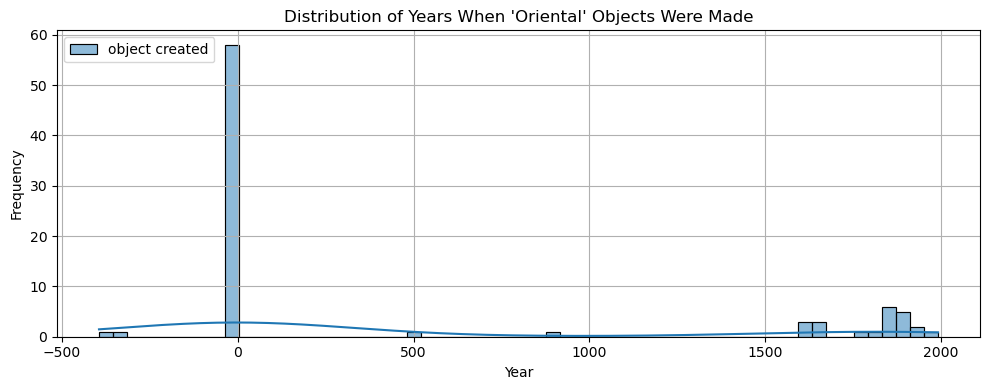

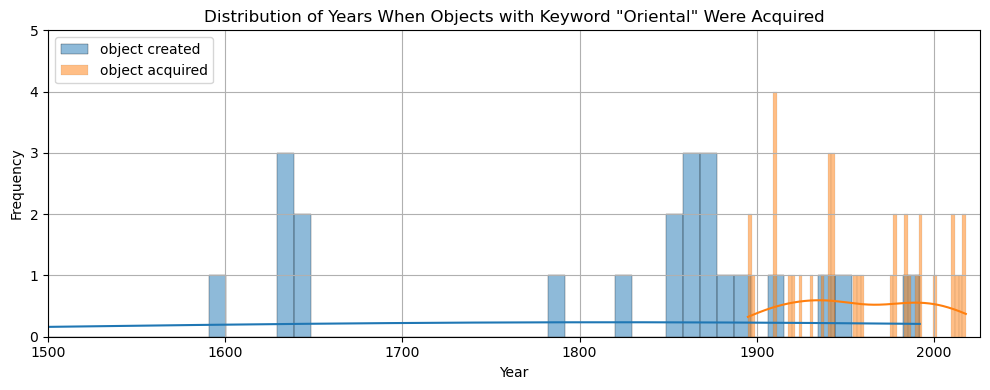

In [211]:
plt.figure(figsize=(10, 4))
sns.histplot(data=o_df, x='dateend', kde=True, label="object created", bins = 60)
plt.title("Distribution of Years When 'Oriental' Objects Were Made")
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
sns.histplot(data=o_df, x='dateend', kde=True, label="object created", bins = 250)
sns.histplot(data=o_df, x='accessionyear', kde=True, label="object acquired", bins = 60)

plt.title('Distribution of Years When Objects with Keyword "Oriental" Were Acquired')
plt.xlim(1500, 2026)
plt.ylim(0, 5)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## We are left with 84 records that should be evaluated, examples of record keywords found:
'oriental woman', 'oriental rug', 'oriental paper', 'oriental cap', 'oriental style', 'oriental dancer', An Oriental Holding a Horse, Nude Oriental Youth

In [934]:
o_df.to_csv("oriental.csv")

o_df = o_df[o_df.title.str.contains('oriental', case = False)]

example_df = pd.concat([example_df, o_df], ignore_index=True)

In [936]:
remove = ['copyright', 'creditline', 'totalpageviews', 'style', 
          'dateend','objectnumber', 'labeltext', 'dimensions']
example_df.drop(remove, axis =1, inplace = True)

example_df.to_csv('example.csv')



In [942]:
brief_example =example_df[['title', 'dated', 'objectid', 'classification', 'accessionmethod']]
display(brief_example)
brief_example.drop([13,12,16,17,19,25, 54,64,71,72,78,79,80,82,83,84,96,132,174], inplace = True)
brief_example.to_csv('brief_example.csv')

title              dated  \
0                                        Negro Soldier               1945   
1               "Jewish farm. Negro. Italian. Farmer."               1942   
2                         Negro Church, South Carolina         March 1936   
3          Small mold-made lamp, Eros or Negroid child                NaN   
4    Negro sharecropper and his wife, Pulaski Count...               1935   
..                                                 ...                ...   
184                The Oriental Peasant and His Family       18th century   
185                            The First Oriental Head               1635   
186        Rembrandt's Mother in an Oriental Headdress               1631   
187    Oriental Merchant with Merchandise at Riverside       17th century   
188                                "Oriental" bracelet  18th-19th century   

     objectid    classification accessionmethod  
0       50190         Paintings        Purchase  
1       55210          Drawings            Gift  
2       71126       Photographs            Gift  
3       92357  Lighting Devices            Gift  
4      156109       Photographs        Transfer  
..        ...               ...             ...  
184    278782            Prints    Not Recorded  
185    279260            Prints    Not Recorded  
186    279263            Prints    Not Recorded  
187    280290            Prints    Not Recorded  
188    210629           Jewelry         Bequest  

[189 rows x 5 columns]

## What is next?

* Add additional keywords to search
* Complete analysis of comment and desctiption fields
* Compute sentiment of comments and descriptions
* Train a language model to find specific biased text in comments and descriptions
* Look in other parts of database for bias

## Access

*  put this notebook in public github repository?
*  put keyword flagged csv's in project folder?

In [173]:
l = search_string_in_dataframe( df, "Seven little Indians" )
image_path =l['url'].values[0]
display(HTML(url = image_path))

i = search_string_in_dataframe( df, "Indian Chiefs Who" )
image_path =i['url'].values[0]
display(HTML(url = image_path))

f = search_string_in_dataframe( df, "Fair Sex" )
image_path =f['url'].values[0]
display(HTML(url = image_path))

n = search_string_in_dataframe( df, "Free Nig" )
image_path =n['url'].values[0]
display(HTML(url = image_path))

## Whats next?
* mine the people fields, look at gender, culture, birthplace, role
* mine publication fields, looking at gender, culture of art, find popular works
* visual search through more of commentary field
* What are other art databases doing with historical derogatory words?
* How are other art databases representing artist's identities?
  